### Standardization 

In [73]:
import pandas as pd

In [74]:
df=pd.read_csv('Social_Network_Ads.csv')

In [75]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [76]:
df.sample(5)

,Age,EstimatedSalary,Purchased
238,46,82000,0
156,46,59000,0
228,40,72000,0
258,58,95000,1
152,31,76000,0


In [77]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [78]:
df.info

<bound method DataFrame.info of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]>

In [79]:
from sklearn.model_selection import train_test_split 

In [80]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [81]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [82]:
x_train.shape

(280, 2)

In [83]:
x_test.shape

(120, 2)

## StandardScaler

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [85]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [86]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [87]:
x_train_scaled
# it is numpy array , we will convert to dataframe

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [88]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_train.columns)

In [89]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [90]:
x_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,3.489272e-17,6.344132e-17
std,1.001791e+00,1.001791e+00
min,-1.947491e+00,-1.584970e+00
25%,-7.710131e-01,-7.752370e-01
50%,-8.473441e-02,2.003677e-02
75%,7.976239e-01,5.261201e-01
max,2.170181e+00,2.319101e+00


In [91]:
import numpy as np
np.round(x_train_scaled.describe(),1)
# see mean is 0 and standard deviation is 1 after the scaling 

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of scaling

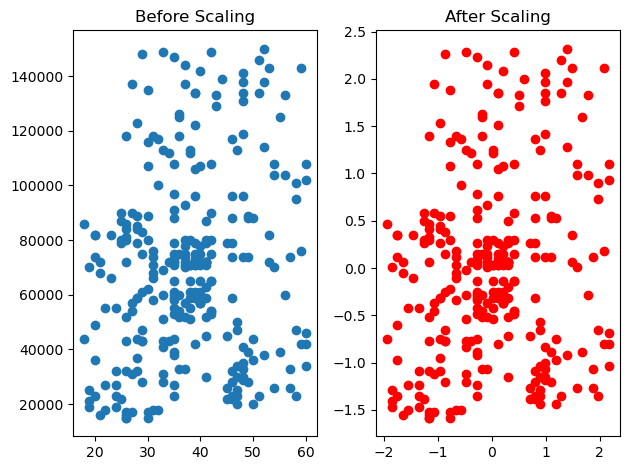

In [92]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.scatter(x_train['Age'],x_train['EstimatedSalary'])
plt.title("Before Scaling")
plt.subplot(1,2,2)
plt.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
plt.title("After Scaling")
plt.tight_layout()
#you can see that data has been centered

In [93]:
# probability distribution function 
import seaborn as sns

C:\Users\Ashvini Mahajan\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ashvini Mahajan\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ashvini Mahajan\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ashvini Mahajan\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

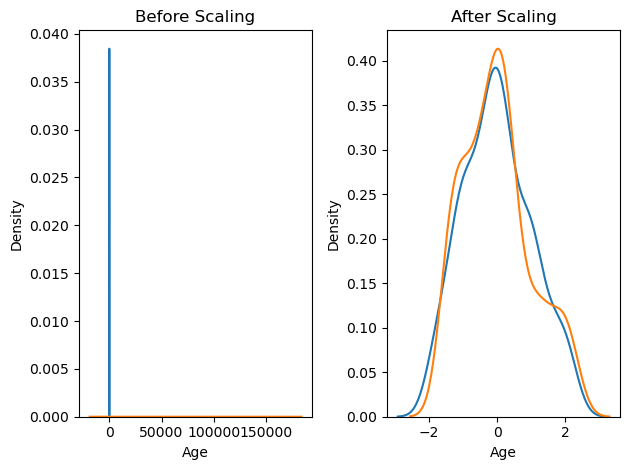

In [94]:
plt.subplot(1,2,1)
plt.title('Before Scaling')
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['EstimatedSalary'])

plt.subplot(1,2,2)
plt.title('After Scaling')
sns.kdeplot(x_train_scaled['Age'])
sns.kdeplot(x_train_scaled['EstimatedSalary'])
plt.tight_layout()
plt.show()
#blue is age 
#orange is estimatedsalary

C:\Users\Ashvini Mahajan\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ashvini Mahajan\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


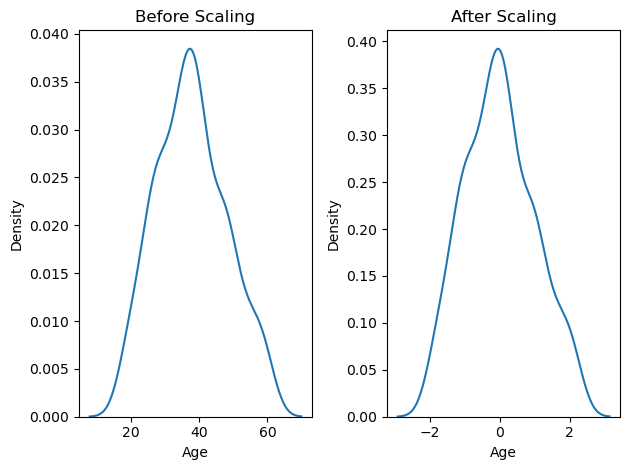

In [95]:
#distribution remains same , only scaling changes
plt.subplot(1,2,1)
plt.title('Before Scaling')
sns.kdeplot(x_train['Age'])

plt.subplot(1,2,2)
plt.title('After Scaling')
sns.kdeplot(x_train_scaled['Age'])
plt.tight_layout()

plt.show()

C:\Users\Ashvini Mahajan\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ashvini Mahajan\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


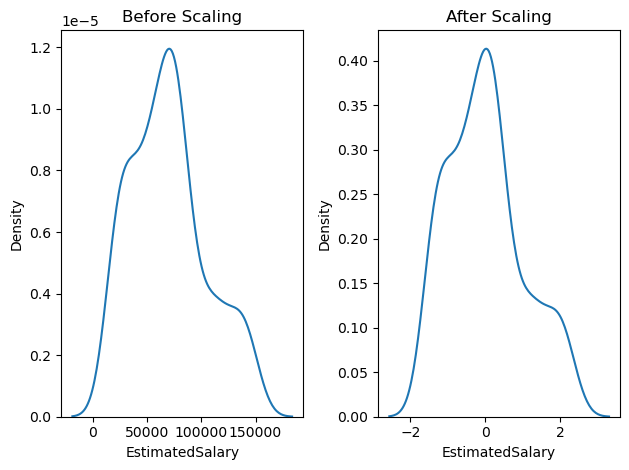

In [96]:
#distribution remains same , only scaling changes
plt.subplot(1,2,1)
plt.title('Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'])

plt.subplot(1,2,2)
plt.title('After Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'])
plt.tight_layout()

plt.show()

## Why scaling is important ?

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
# we will train one normal and one scaled
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [99]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [100]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [101]:
# Following shows that accuracy score of model is better when we use scaling
from sklearn.metrics import accuracy_score
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


## Scaling does not affect some algorithms like Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()


In [103]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [104]:
y_pred=dt.predict(x_test)
y_pred_scaled=dt_scaled.predict(x_test_scaled)

In [105]:
from sklearn.metrics import accuracy_score
print('Acutal', accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Acutal 0.8666666666666667
Scaled 0.8666666666666667


## effect of outlier 

In [106]:
# if there are outlier then they will also get scaled but will be present . you will have to handle outlier explicitly

In [107]:
# in short , there is no effect of scaling on outlier

In [108]:
#in above dataset we don't have ouliers. Let us add outlier

In [110]:
df = df._append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

In [111]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1
